In [203]:
import pandas as pd
# from fbprophet import Prophet
import pandas
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import numpy as np
from praveganb.pravega_stream import UnindexedStream
import seaborn as sns
import pytz
import grpc
import imp
import pravega.grpc_gateway as pravega
from datetime import datetime, timedelta
%matplotlib inline

# Setup the Connection with pravega and Read System Usage

In [204]:
gateway = '10.243.54.104:80'
scope = 'alerts'
stream = 'snmp-enriched'

In [205]:
pravega_channel = grpc.insecure_channel(gateway, options=[
        ('grpc.max_receive_message_length', 9*1024*1024),
    ])
pravega_client = pravega.grpc.PravegaGatewayStub(pravega_channel)

In [206]:
snmpdata = UnindexedStream(scope='alerts', stream='snmp-enriched', pravega_client=pravega_client)
events = snmpdata.read_events_from_stream(stop_at_tail=True)


In [207]:
df = pd.DataFrame(list(events))

In [208]:
df['timeStrStamp'] = pandas.to_datetime(df['receivedTimestamp'],unit="ms",utc=True)

In [209]:
minTime = (datetime.now() - timedelta(hours = 2)).timestamp() * 1000

In [210]:
df = df[(df.receivedTimestamp > minTime )]

# Notify Level for Past Two Hours

In [211]:
df.notifyLevel.value_counts()

0    331
5    240
2      1
Name: notifyLevel, dtype: int64

# Notify Type and Message Breakdown By Device for Past Two Hours

In [212]:
df[['deviceMibModule','notifyLevel', 'notifyMessage']].value_counts()

deviceMibModule  notifyLevel  notifyMessage                                        
ISILON-TRAP-MIB  0            External network problem                                 288
SCALEIO-MIB      5            System.Credentials.MDM_CREDENTIALS_ARE_NOT_CONFIGURED    240
ISILON-TRAP-MIB  0            SW_TEST_EVENT                                             24
                              SW_MOUNTD_CLIENT_MOUNT_FAILED                             18
SCALEIO-MIB      2            Esrs.Esrs.NOT_REGISTERED                                   1
ECS-MIB          0            Send SNMP Test Trap                                        1
dtype: int64

# Notify Message Breakdown by Count for Past Two Hours

In [213]:
s = df.notifyMessage.value_counts()

<AxesSubplot:>

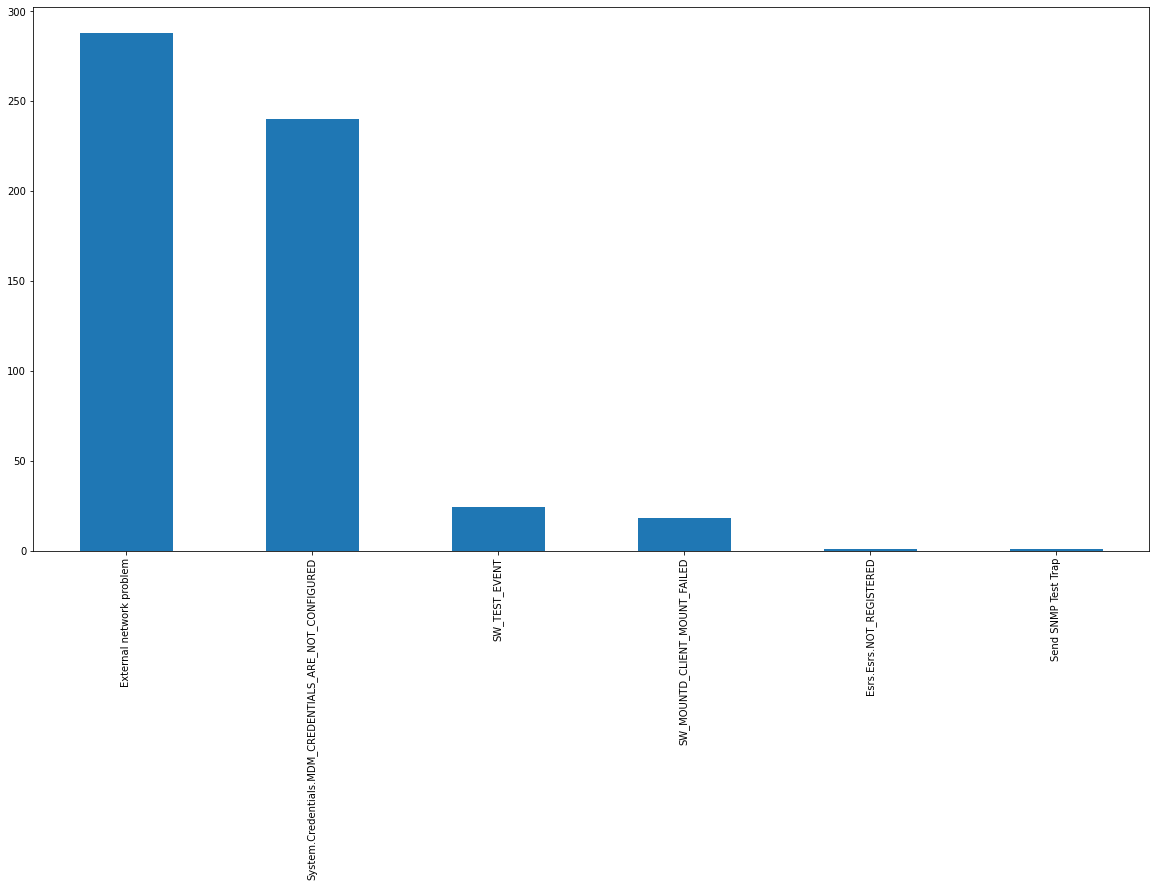

In [214]:
s.plot(kind='bar', figsize=(20,10))